Group: Seunghyeon (Hyeon) Kim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import pearsonr

## Erdős-Rényi graph
First create an Erdős-Rényi graph

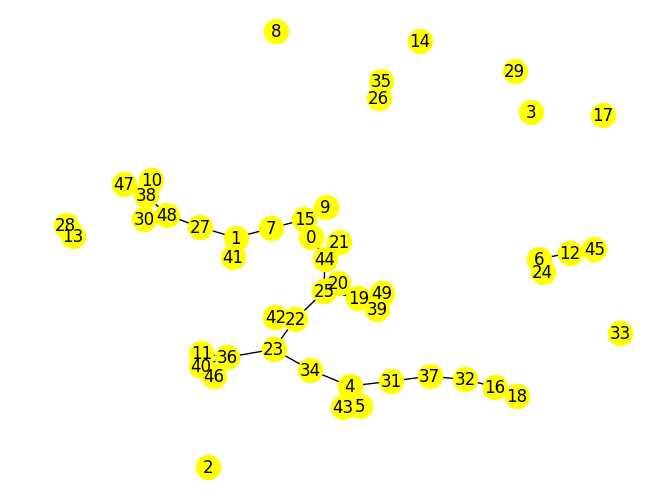

In [2]:
ER = nx.erdos_renyi_graph(50,0.03,seed=19)
nx.draw(ER,with_labels=True,node_color='yellow')

In [ ]:
G = ER.copy()
deg = list(G.degree())
for i,k in deg:
    if k == 0:
        G.remove_node(i)

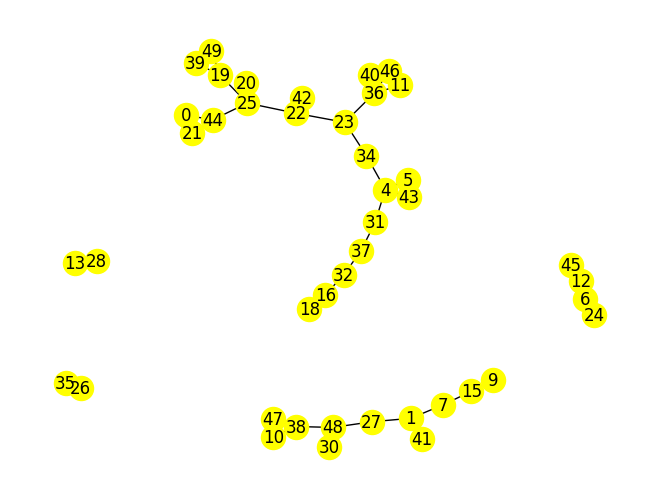

In [ ]:
nx.draw(G,with_labels=True,node_color='yellow')

In [ ]:
cc = list(nx.connected_components(ER))

In [ ]:
ccsize = [len(c) for c in cc]
print(ccsize)

[24, 11, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1]


In [ ]:
largest = cc[ccsize.index(max(ccsize))]
print(largest)

{0, 4, 5, 11, 16, 18, 19, 20, 21, 22, 23, 25, 31, 32, 34, 36, 37, 39, 40, 42, 43, 44, 46, 49}


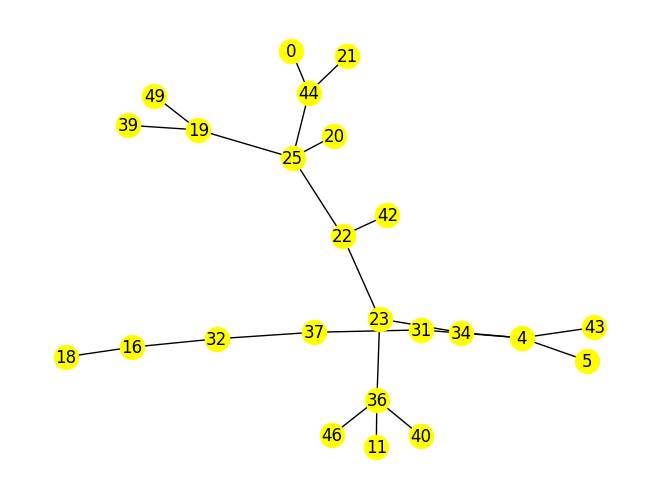

In [ ]:
G = ER.subgraph(largest)
nx.draw(G,with_labels=True,node_color='yellow')

(array([ 7., 23., 10.,  7.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

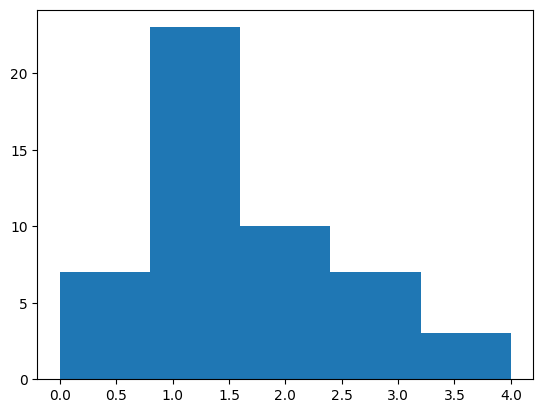

In [ ]:
plt.hist(list(dict(ER.degree()).values()),bins=5)

In [ ]:
#Many lists: enamble average
N = 50
p = 0.05
sample = 100
degrees = []
for _ in range(sample):
    ER = nx.erdos_renyi_graph(N,p)
    degrees = degrees + list(dict(ER.degree()).values())
print(len(degrees))

5000


(array([ 398., 1002., 1345., 1102.,  668.,  303.,  116.,   51.,   11.,
           4.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

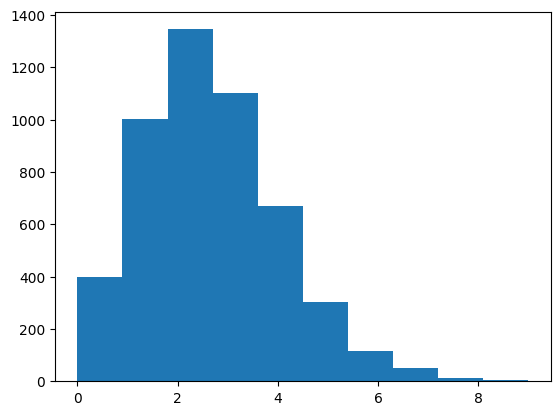

In [ ]:
plt.hist(degrees)

In [ ]:
mean = np.array(degrees).mean()
print(mean)

2.4724


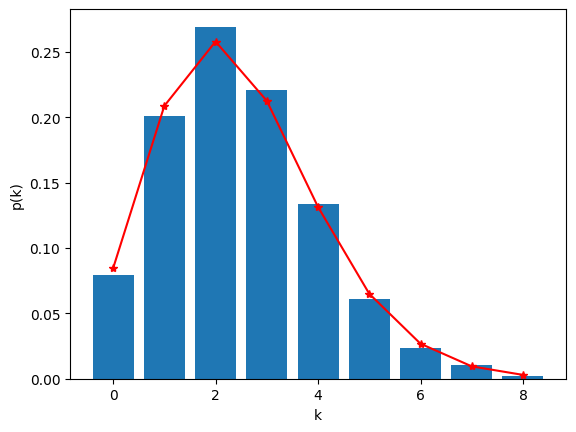

In [ ]:
bins = np.arange(10) - 0.5
plt.hist(degrees,density=True,bins=bins,rwidth=0.8);
x = np.arange(9)
plt.plot(x,poisson.pmf(x, mu = mean),"r*-")
plt.xlabel("k")
plt.ylabel("p(k)")
plt.savefig("ER_kdist%d_%g.pdf" % (N,p))

In [ ]:
h,b = np.histogram(degrees,bins=bins,density=True)
print(h)
print(b)

[0.07966373 0.20056045 0.26921537 0.22057646 0.13370697 0.06064852
 0.02321857 0.01020817 0.00220176]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


## Coefficeint of determination

https://en.wikipedia.org/wiki/Coefficient_of_determination

If $\bar{y}$ is the mean of the observed data:
$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i $$
then the variability of the data set can be measured with two Mean squared error formulas:
* The sum of squares of residuals, also called the residual sum of squares:
$$SS_\text{res}=\sum_i (y_i - f_i)^2,$$
* The total sum of squares (proportional to the variance of the data):
$$SS_\text{tot}=\sum_i (y_i - \bar{y})^2$$

The most general definition of the coefficient of determination is
$$R^2 = 1 - {SS_{\rm res}\over SS_{\rm tot}} $$

In the best case, the modeled values exactly match the observed values, which results in $SS_\text{res}=0$ and $R^2=1$. A baseline model, which always predicts $\bar y$, will have $R^2=0$.

In [ ]:
# in matrix format, between all pairs of data
np.corrcoef(h, poisson.pmf(x, mu = mean))

array([[1.       , 0.9984649],
       [0.9984649, 1.       ]])

In [ ]:
#or the just between original and fitted, the result is really good.
np.corrcoef(h, poisson.pmf(x, mu = mean))[0,1]

0.9984649008569554

### Assortativity

In [ ]:
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    print(neighdeg)


[3]
[1, 2, 2, 1]
[4]
[4]
[1, 2]
[2]
[4, 1, 1]
[4]
[3]
[3, 4, 1]
[3, 2, 4]
[3, 1, 3, 3]
[4, 2]
[2, 2]
[4, 3]
[1, 3, 1, 1]
[2, 2]
[3]
[4]
[3]
[4]
[1, 1, 4]
[4]
[3]


In [ ]:
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    print(G.degree(i),np.array(neighdeg).mean())

1 3.0
4 1.5
1 4.0
1 4.0
2 1.5
1 2.0
3 2.0
1 4.0
1 3.0
3 2.6666666666666665
3 3.0
4 2.5
2 3.0
2 2.0
2 3.5
4 1.5
2 2.0
1 3.0
1 4.0
1 3.0
1 4.0
3 2.0
1 4.0
1 3.0


In [ ]:
G = nx.erdos_renyi_graph(1000,0.01)
maxdegree = max(list(dict(G.degree()).values()))
knn = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    k = G.degree(i)
    num[k] += 1
    knn[k] += np.array(neighdeg).mean()

<ipython-input-21-71ef7fe49261>:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(knn/num,"r*-")


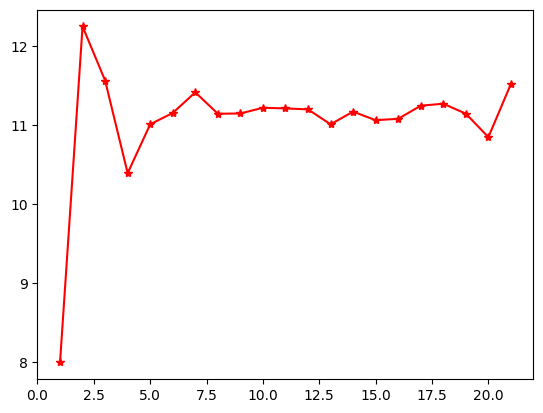

In [ ]:
plt.plot(knn/num,"r*-")

In [ ]:
np.array(list(dict(G.degree()).values())).mean()

10.116

In [ ]:
cond = (num>0)

In [ ]:
pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])

<ipython-input-25-359237f1f6c8>:1: RuntimeWarning: invalid value encountered in divide
  pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])


PearsonRResult(statistic=0.2577926366848655, pvalue=0.2592281745406984)

<ipython-input-26-a8defbde8e35>:1: RuntimeWarning: invalid value encountered in divide
  plt.plot((knn/num)[cond],"r*-")


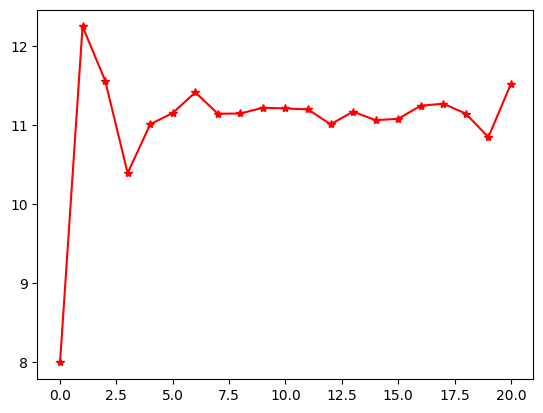

In [ ]:
plt.plot((knn/num)[cond],"r*-")

## Clustering

In [ ]:
np.array(list(dict(nx.clustering(G)).values())).mean()

0.009998996402634174

In [ ]:
nx.diameter(ER)

7

In [ ]:
nx.diameter(G)

6

# Hands on exercises
Files downloaded from https://networkrepository.com/inf.php

In [ ]:
# prompt: load a file containing edge list with integer indices into networkx graph comments are %

# Load the edge list from the file
G = nx.read_edgelist("/content/drive/MyDrive/AIT-Networks/Week02/data/inf-euroroad.edges", nodetype=int, comments="%")

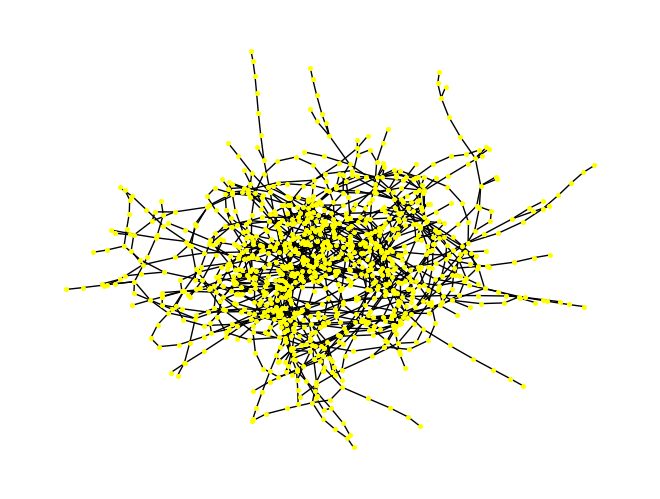

In [ ]:
nx.draw(G,node_color='yellow',node_size=7)

## Tasks
 0. Load the file `inf-euroroads.edges`
 1. Calculate and plot the degree distribution
 2. Calculate and plot the clustering coefficient as funtions of $k$
 3. Calculate and plot the assortativity
 4. Measure the diameter of the largest component
 5. Do the same for `inf-openflights.edges`
 6. We will discuss the differences

In [ ]:
# 0. Load the file inf-euroroads.edges
# prompt: load a file containing edge list with integer indices into networkx graph comments are %

# Load the edge list from the file
G_euroroads = nx.read_edgelist("/content/drive/MyDrive/AIT-Networks/Week02/data/inf-euroroad.edges", nodetype=int, comments="%")

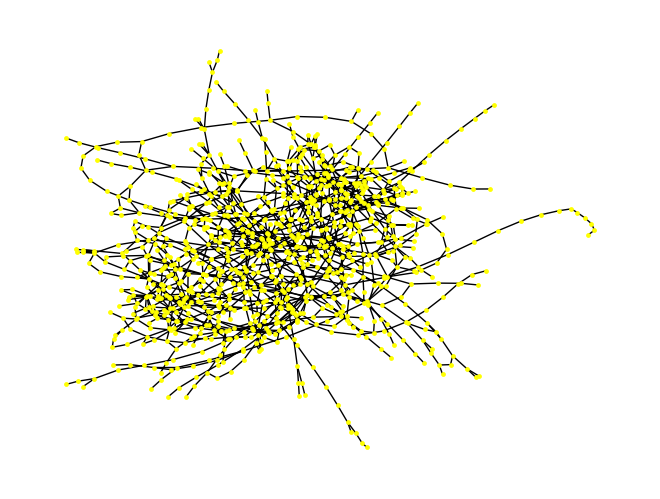

In [ ]:
nx.draw(G,node_color='yellow',node_size=6)

(array([190., 612., 186., 113.,  47.,  15.,   5.,   5.,   0.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

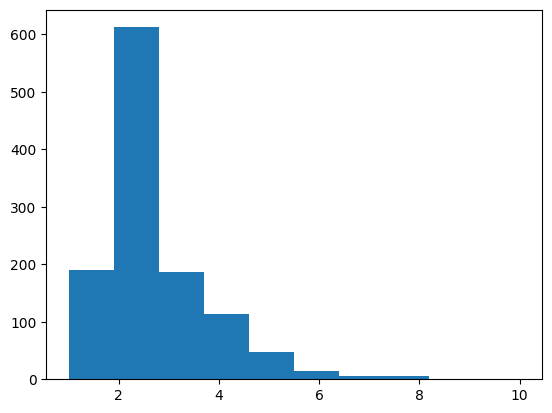

In [ ]:
# 1. Calculate and plot the degree distribution
deg = list(dict(G_euroroads.degree()).values())
plt.hist(deg,bins=10)

<ipython-input-68-893902b08049>:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(knn/num,"r*-")


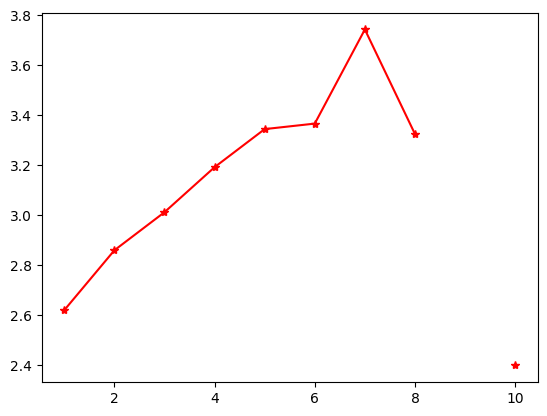

In [ ]:
# 2. Calculate and plot the clustering coefficient as funtions of  𝑘
# go through neighbors:
for i in G_euroroads.nodes():
    neighdeg = [G_euroroads.degree(j) for j in G_euroroads.neighbors(i)]
    # print(G_euroroads.degree(i),np.array(neighdeg).mean())
maxdegree = max(list(dict(G_euroroads.degree()).values()))
knn = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
# go through neighbors:
for i in G_euroroads.nodes():
    neighdeg = [G_euroroads.degree(j) for j in G_euroroads.neighbors(i)]
    k = G_euroroads.degree(i)
    num[k] += 1
    knn[k] += np.array(neighdeg).mean()
plt.plot(knn/num,"r*-")

<ipython-input-69-ed8c3f868f71>:4: RuntimeWarning: invalid value encountered in divide
  pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])
<ipython-input-69-ed8c3f868f71>:5: RuntimeWarning: invalid value encountered in divide
  plt.plot((knn/num)[cond],"r*-")


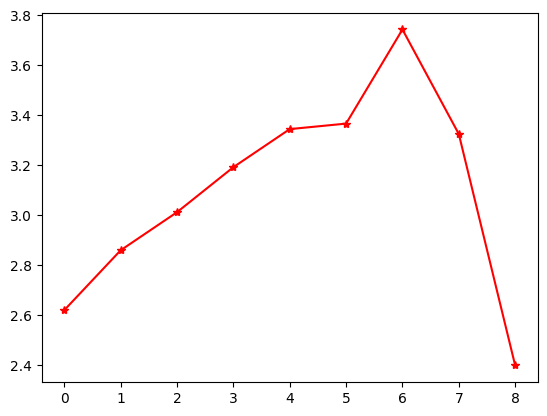

In [ ]:
# 3. Calculate and plot the assortativity
np.array(list(dict(nx.clustering(G_euroroads)).values())).mean()
cond = (num>0)
pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])
plt.plot((knn/num)[cond],"r*-")

In [ ]:
# 4. Measure the diameter of the largest component
cc = list(nx.connected_components(G_euroroads))
ccsize = [len(c) for c in cc]
largest = cc[ccsize.index(max(ccsize))]
G_euroroads = G_euroroads.subgraph(largest)
np.array(list(dict(nx.clustering(G_euroroads)).values())).mean()
nx.diameter(G_euroroads)

62

In [ ]:
# 5.0. Do the same for inf-openflights.edges
G_openflights = nx.read_edgelist("/content/drive/MyDrive/AIT-Networks/Week02/data/inf-openflights.edges", nodetype=int, comments="%")

(array([2.62e+03, 1.65e+02, 6.50e+01, 4.20e+01, 2.40e+01, 1.00e+01,
        8.00e+00, 2.00e+00, 1.00e+00, 2.00e+00]),
 array([  1. ,  25.1,  49.2,  73.3,  97.4, 121.5, 145.6, 169.7, 193.8,
        217.9, 242. ]),
 <BarContainer object of 10 artists>)

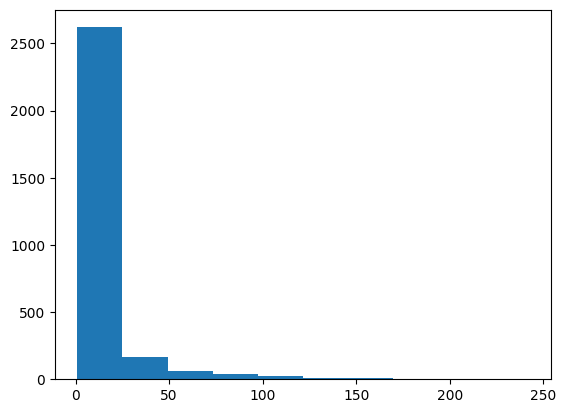

In [ ]:
# 5.1. Calculate and plot the degree distribution
deg = list(dict(G_openflights.degree()).values())
plt.hist(deg,bins=10)

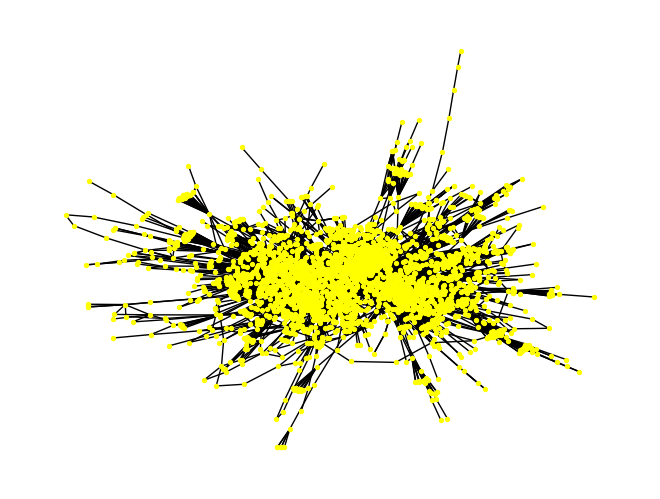

In [ ]:
nx.draw(G_openflights,node_color='yellow',node_size=8)

<ipython-input-76-9e3e8a31ac30>:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(knn/num,"r*-")


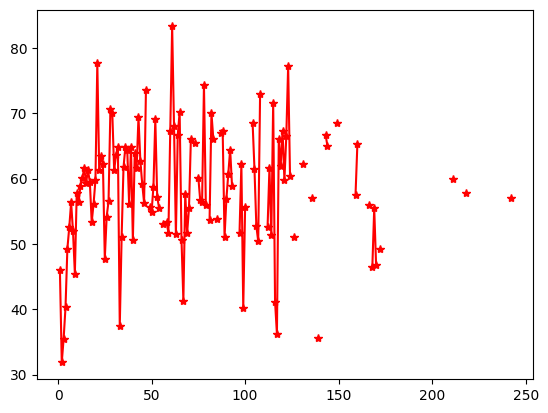

In [ ]:
# 5.2. Calculate and plot the clustering coefficient as funtions of  𝑘
# go through neighbors:
for i in G_openflights.nodes():
    neighdeg = [G_openflights.degree(j) for j in G_openflights.neighbors(i)]
    # print(G_openflights.degree(i),np.array(neighdeg).mean())
maxdegree = max(list(dict(G_openflights.degree()).values()))
knn = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
# go through neighbors:
for i in G_openflights.nodes():
    neighdeg = [G_openflights.degree(j) for j in G_openflights.neighbors(i)]
    k = G_openflights.degree(i)
    num[k] += 1
    knn[k] += np.array(neighdeg).mean()
plt.plot(knn/num,"r*-")

<ipython-input-77-985d0e74629e>:4: RuntimeWarning: invalid value encountered in divide
  pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])
<ipython-input-77-985d0e74629e>:5: RuntimeWarning: invalid value encountered in divide
  plt.plot((knn/num)[cond],"r*-")


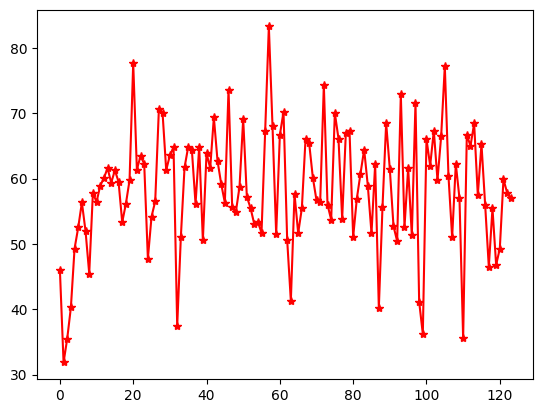

In [ ]:
# 5.3. Calculate and plot the assortativity
np.array(list(dict(nx.clustering(G_openflights)).values())).mean()
cond = (num>0)
pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])
plt.plot((knn/num)[cond],"r*-")

In [ ]:
# 5.4. Measure the diameter of the largest component
cc = list(nx.connected_components(G_openflights))
ccsize = [len(c) for c in cc]
largest = cc[ccsize.index(max(ccsize))]
G_openflights = G_openflights.subgraph(largest)
np.array(list(dict(nx.clustering(G_openflights)).values())).mean()
nx.diameter(G_openflights)

14